### Loading Data

In [1]:
import numpy as np
import pandas as pd
datas = np.load('E_origninal.npy')
numero_senseur = np.load('numeroDesCapteur.npy')


### Imputation by the precedent value 

In [2]:
#naive imputation by the precedent value
def imputation_precedent(data):
    m,n = data.shape
    for i in range(m):
        for j in range(n):
            if data[i,j] == -1:
                data[i,j] = data[i,j-1]
    return None

imputation_precedent(datas)

datas_pandas = pd.DataFrame(datas)
datas_pandas.index = numero_senseur

nb_cap = 1 # datas.shape[0]
voisin = np.load('tousLesVoisinsDeTouslesPionts.npy',allow_pickle = True)
datas_pandas.head()



,0,1,2,3,4,5,6,7,8,9,...,33328,33329,33330,33331,33332,33333,33334,33335,33336,33337
158895,77,83,74,72,79,86,91,74,74,75,...,84,84,84,84,65,65,65,65,65,68
187509,12,12,12,16,16,31,31,31,31,31,...,32,32,32,32,32,32,32,32,32,32
195041,52,56,55,58,53,52,54,54,52,58,...,46,46,46,46,46,46,46,46,46,46
195552,0,0,0,0,0,0,0,0,0,13,...,38,38,38,27,27,19,19,19,19,19
209827,46,47,47,47,50,48,43,46,50,49,...,63,63,63,58,58,56,56,56,56,85


### Creating a table of the sensor to modelizse with his neighbor's data 

In [3]:
#creating a table of the sensor to modelizse with his neighbor's data 
#for i in range(nb_cap):
cap = voisin[0]
model_cap = pd.DataFrame(columns = np.arange(datas.shape[1]))
for ind in range(len(cap)):
    model_cap.loc[ind] = datas_pandas.loc[cap[ind]]

#numerate neighbor sensor and efface their sensor number
model_cap = model_cap.astype(int)

model_cap


,0,1,2,3,4,5,6,7,8,9,...,33328,33329,33330,33331,33332,33333,33334,33335,33336,33337
0,77,83,74,72,79,86,91,74,74,75,...,84,84,84,84,65,65,65,65,65,68
1,65,65,70,70,68,66,68,70,70,70,...,41,41,69,69,69,69,69,69,69,81
2,84,79,79,84,95,87,82,86,91,82,...,57,57,57,57,89,86,86,86,86,91
3,35,34,33,34,33,34,37,36,36,33,...,33,33,33,33,38,35,35,35,35,35
4,26,27,29,29,23,33,31,27,29,29,...,33,33,33,33,33,33,33,33,33,33
5,90,91,90,96,90,90,91,88,91,94,...,82,82,128,82,81,67,67,67,67,75


In [4]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
model_capT = model_cap.transpose()
model_capT.hist()
scatter_matrix(model_capT)
plt.show()

<Figure size 640x480 with 6 Axes>

<Figure size 640x480 with 36 Axes>

### Adding random gaussian noise manually to the p% of the data in the model sensor as a trial

In [5]:
#adding gaussian noise manually
#sampling of p% of model_capets and creation of label
np.random.seed(42)
p= 0.05
model_sensor = model_cap.iloc[0,:].copy()
sample = np.random.choice(range(model_sensor.shape[0]),int(p*model_sensor.shape[0]),replace= False)
sample = np.unique(sample)
label = np.zeros(model_sensor.shape)
print(sample, sample.shape)
print(np.mean(model_sensor))
#adding gaussien noise to p% of the model_capet, mu mean, sigma ecart-type

mu = 0.7* np.mean(model_sensor)
#mu = 100
sigma = 0.3*np.mean(model_sensor)
#sigma = 10

for i in range(len(sample)):
    label[sample[i]] = 1
    model_sensor[sample[i]] += np.random.normal(mu,sigma)

 # verifacation whether we have p% model_cap
print(label)
print(model_sensor,model_sensor.shape)

#replace sensor data in the original data
model_noise = model_cap.copy()
model_noise.iloc[0,:] = model_sensor
#model_cap
model_cap
model_noise

[   46    83   119 ... 33148 33287 33302] (1666,)
81.05309256704061
[0. 0. 0. ... 0. 0. 0.]
0        77
1        83
2        74
3        72
4        79
         ..
33333    65
33334    65
33335    65
33336    65
33337    68
Name: 0, Length: 33338, dtype: int32 (33338,)


,0,1,2,3,4,5,6,7,8,9,...,33328,33329,33330,33331,33332,33333,33334,33335,33336,33337
0,77,83,74,72,79,86,91,74,74,75,...,84,84,84,84,65,65,65,65,65,68
1,65,65,70,70,68,66,68,70,70,70,...,41,41,69,69,69,69,69,69,69,81
2,84,79,79,84,95,87,82,86,91,82,...,57,57,57,57,89,86,86,86,86,91
3,35,34,33,34,33,34,37,36,36,33,...,33,33,33,33,38,35,35,35,35,35
4,26,27,29,29,23,33,31,27,29,29,...,33,33,33,33,33,33,33,33,33,33
5,90,91,90,96,90,90,91,88,91,94,...,82,82,128,82,81,67,67,67,67,75


In [6]:
print("mu,sigma:",mu,sigma)

mu,sigma: 56.73716479692842 24.315927770112182


### Creating new feature in the model

In [7]:
#replace data by difference and difference square
model_diff = pd.DataFrame(columns = np.arange(datas.shape[1]))
model_noise_diff = pd.DataFrame(columns = np.arange(datas.shape[1]))
for ind in range(1,len(cap)):
    #model_diff.loc['cap{}-cap0'.format(str(ind))] = np.abs(datas_pandas.loc[cap[ind]] - datas_pandas.iloc[0])
    model_diff.loc['cap{}-cap0'.format(str(ind))] = (model_cap.loc[ind] - model_cap.iloc[0])
    model_noise_diff.loc['cap{}-cap0'.format(str(ind))] = (model_noise.loc[ind] - model_noise.iloc[0])
    #model_diff.loc['cap{}-cap0 square'.format(str(ind))] = (datas_pandas.loc[cap[ind]]
                                                                #- datas_pandas.iloc[0])**2


model_diff = model_diff.astype(int)
model_diff = model_diff.transpose()
model_diff
model_noise_diff = model_noise_diff.astype(int)
model_noise_diff = model_noise_diff.transpose()
model_noise_diff

,cap1-cap0,cap2-cap0,cap3-cap0,cap4-cap0,cap5-cap0
0,-12,7,-42,-51,13
1,-18,-4,-49,-56,8
2,-4,5,-41,-45,16
3,-2,12,-38,-43,24
4,-11,16,-46,-56,11
...,...,...,...,...,...
33333,4,21,-30,-32,2
33334,4,21,-30,-32,2
33335,4,21,-30,-32,2
33336,4,21,-30,-32,2


model_noise_diff.describe()

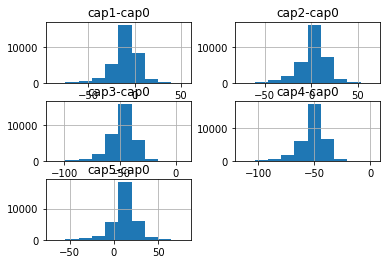

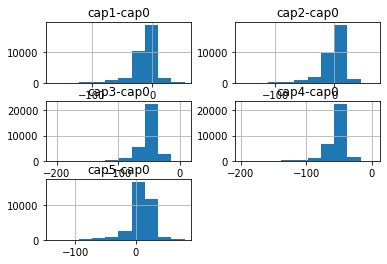

In [8]:
model_diff.hist()
plt.show()
model_noise_diff.hist()
plt.show()

(0, 100)

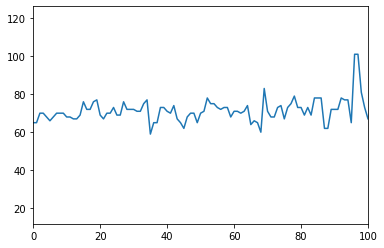

In [9]:
fig,ax = plt.subplots()
model_cap = model_cap.transpose()
plt.plot(model_cap.iloc[:,1])
ax.set_xlim(0,100)

Text(0.5, 0, 'x1-x0')

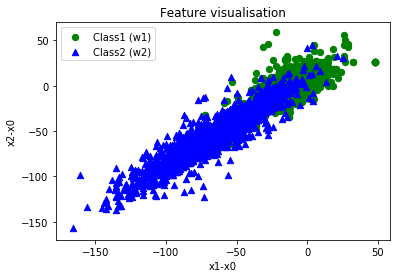

In [10]:
fig,ax = plt.subplots()

limit = 2000
outlier_index = np.array(np.where(label == 1))[0,:limit]

X1_samples = model_diff.values[:limit,0:2]
X2_samples = model_noise_diff.values[outlier_index,0:2]


ax.scatter(X1_samples[:, 0], X1_samples[:,1], marker = 'o',color = 'green', s=40)
ax.scatter(X2_samples[:, 0], X2_samples[:,1], marker = '^',color = 'blue', s =40)
plt.legend(['Class1 (w1)', 'Class2 (w2)'], loc = 'upper left')
plt.title('Feature visualisation')
plt.ylabel('x2-x0')
plt.xlabel('x1-x0')


### Visualisation of histogram,covariance matrix and correlation heat map

### Creating training set and test set

In [11]:

trainset_perc = 0.7

#limiting data to have a smaller dataset to test

#time_limit = datas.shape[1]
time_limit = 15000

X = model_diff.values[:time_limit,:]

outlier_index = np.array(np.where(label == 1))
X_outliers = model_noise_diff.values[outlier_index,:][0]

train_size = int(trainset_perc*time_limit)
X_train,X_test = X[:train_size,:],X[train_size:,:]



print(X_train.shape,X_test.shape,X_outliers.shape)

(10500, 5) (4500, 5) (1666, 5)


### One class classification SVM Novelty Detection

In [12]:

trainset_perc = 0.7

#limiting data to have a smaller dataset to test

#time_limit = datas.shape[1]
time_limit = 15000

X = model_diff.values[:time_limit,:]
X_noise = model_noise_diff.values[:time_limit,:]
Y = label[:time_limit]

outlier_index = np.array(np.where(label == 1))
X_outliers = model_noise_diff.values[outlier_index,:][0]


train_size = int(trainset_perc*time_limit)

X_train_SVM,X_test_SVM = X[:train_size,:],X_noise[train_size:,:]
Y_train,Y_test = Y[:train_size],Y[train_size:]


print(X_train_SVM.shape,X_test_SVM.shape,X_outliers.shape)
print(Y_train.shape, Y_test.shape)

(10500, 5) (4500, 5) (1666, 5)
(10500,) (4500,)


Accuracy on train set: 0.679429
Accuracy on outliers set: 0.978992
Accuracy on test set: 0.35777777777777775
              precision    recall  f1-score   support

         0.0       1.00      0.32      0.49      4270
         1.0       0.07      0.98      0.14       230

    accuracy                           0.36      4500
   macro avg       0.53      0.65      0.31      4500
weighted avg       0.95      0.36      0.47      4500



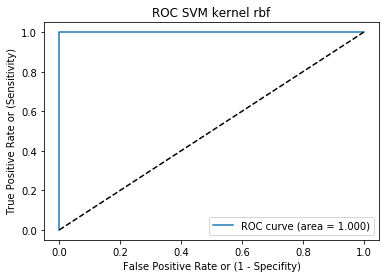

In [14]:

from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc



clf = OneClassSVM(nu = 0.05,kernel = 'rbf',gamma = p).fit(X_train_SVM)

y_pred_train = clf.predict(X_train_SVM)
y_pred_test = clf.predict(X_test_SVM)
y_pred_outliers = clf.predict(X_outliers)

n_error_train = y_pred_train[y_pred_train == -1].size/y_pred_train.size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size/y_pred_outliers.size

print('Accuracy on train set: %f' % (1-n_error_train))
print('Accuracy on outliers set: %f' % (1-n_error_outliers))


# Reshape the prediction values to 0 for valid and 1 for fraudulent
y_pred_test[y_pred_test == 1] = 0
y_pred_test[y_pred_test == -1] = 1
#print(confusion_matrix(Y_test,y_pred_test))

print('Accuracy on test set:', accuracy_score(Y_test, y_pred_test))
print(classification_report(Y_test, y_pred_test))



y_score = -clf.score_samples(X_test_SVM)
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_pred_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('ROC SVM kernel rbf')
plt.legend(loc="lower right")

                    

### Isolation Forest

In [15]:
#for isolation forest, training set should not be polluated by noise
trainset_perc = 0.7

#limiting data to have a smaller dataset to test

#time_limit = datas.shape[1]
time_limit = 15000

X = model_diff.values[:time_limit,:]
X_noise = model_noise_diff.values[:time_limit,:]
Y = label[:time_limit]

outlier_index = np.array(np.where(label == 1))
X_outliers = model_noise_diff.values[outlier_index,:][0]

train_size = int(trainset_perc*time_limit)

X_train,X_test = X[:train_size,:],X_noise[train_size:,:]
Y_train,Y_test = Y[:train_size],Y[train_size:]


print(X_train.shape,X_test.shape,X_outliers.shape)
print(Y_train.shape, Y_test.shape)

(10500, 5) (4500, 5) (1666, 5)
(10500,) (4500,)


D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
D:\Anaconda3\envs\tensorflow\lib\si

Accuracy on train set: 0.900000
Accuracy on outliers set: 0.899760
[[3842  428]
 [  23  207]]
0.8997777777777778
              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94      4270
         1.0       0.33      0.90      0.48       230

    accuracy                           0.90      4500
   macro avg       0.66      0.90      0.71      4500
weighted avg       0.96      0.90      0.92      4500



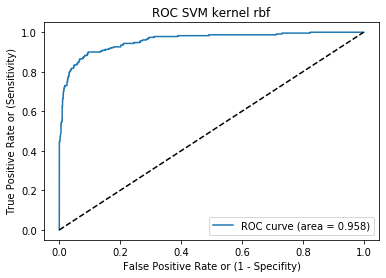

In [16]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

clf = IsolationForest(random_state = 42)
clf.fit(X_train)


y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

n_error_train = y_pred_train[y_pred_train == -1].size/y_pred_train.size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size/y_pred_outliers.size

print('Accuracy on train set: %f' % (1-n_error_train))
print('Accuracy on outliers set: %f' % (1-n_error_outliers))

# Reshape the prediction values to 0 for valid and 1 for fraudulent
y_pred_test[y_pred_test == 1] = 0
y_pred_test[y_pred_test == -1] = 1
print(confusion_matrix(Y_test,y_pred_test))
print(accuracy_score(Y_test, y_pred_test ))
print(classification_report(Y_test, y_pred_test ))



y_score = -clf.score_samples(X_test)
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(Y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('ROC SVM kernel rbf')
plt.legend(loc="lower right")


### Plot of ROC curve